In [4]:
import pandas as pd
import numpy as np

FileName = "FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000"
InputFileExt = ".dat"
df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")
df.to_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.csv")
# print(df.head())
# print(df.head(1))
#Drop index 1,3,4 -- ie, 0,2,3
df_AfterDropping = df.drop([df.index[1],df.index[3],df.index[4]])
# print(df_AfterDropping.head())
df2 = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.csv",header=None)
# print(df2.head(2))

df2_drop = df2.drop([df2.index[0], df2.index[2],df2.index[3]])
# print(df2_drop.head(4))

#Assign new header as columns
new_header = df2_drop.iloc[0]
df2_drop = df2_drop[1:]
df2_drop.columns = new_header
df_new = df2_drop.reset_index(drop=True)
# print(df2_drop.head(4))
print(df_new.head(3))


/tmp/ipykernel_821139/2283771641.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.dat")


1            TIMESTAMP   RECORD  Year Month Day_of_Month Day_of_Week  \
0  2023-09-14 00:00:01  4197326  2023     9           14           5   
1  2023-09-14 00:00:02  4197327  2023     9           14           5   
2  2023-09-14 00:00:03  4197328  2023     9           14           5   

1 Day_of_Year Hour Minute Second BattVolt  PTemp AirTemp     Rh SBTemp_1265  \
0         257    0      0      1    12.07  25.33    26.9  51.91       26.41   
1         257    0      0      2    12.07  25.33   26.94  51.91       26.41   
2         257    0      0      3    12.07  25.33    26.9  51.84       26.41   

1 TargTemp_1265     TmV_1265       CO2       H2O  
0         25.38  -0.04931376  417.7919  19.33264  
1         25.45  -0.04587165  417.9424  19.21043  
2          25.4  -0.04845481   419.392  19.16465  


/tmp/ipykernel_821139/2283771641.py:13: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000.csv",header=None)


In [49]:
#Count No of Rows --
print(df_new.count())
# print(df_new["TIMESTAMP"])

df_TimeStamp = df_new["TIMESTAMP"]

#Check the length of data = 86400 ie, 24*60*60 secs in a day
if( df_TimeStamp.count() != 86400):
    print("Length not 86400 !!!--")
else:
    print("Length = 86400 -- Good data!")

columnsToDrop = ["RECORD","Year", "Month","Day_of_Month","Day_of_Week","Day_of_Year","Hour","Minute","Second"]
# del df_new["RECORD"] , df_new["Year"] , df_new["Month"], df_new["Day_of_Month"]
# del df_new["Day_of_Week"] , df_new["Day_of_Year"] , df_new["Hour"], df_new["Minute"], df_new["Second"]
df_Clean = df_new.drop(columnsToDrop, inplace=True, axis=1)

# print(df_new.count())
print(df_new.count())


1
TIMESTAMP        86400
RECORD           86400
Year             86400
Month            86400
Day_of_Month     86400
Day_of_Week      86400
Day_of_Year      86400
Hour             86400
Minute           86400
Second           86400
BattVolt         86400
PTemp            86400
AirTemp          86400
Rh               86400
SBTemp_1265      86400
TargTemp_1265    86400
TmV_1265         86400
CO2              86400
H2O              86400
dtype: int64
Length = 86400 -- Good data!
1
TIMESTAMP        86400
BattVolt         86400
PTemp            86400
AirTemp          86400
Rh               86400
SBTemp_1265      86400
TargTemp_1265    86400
TmV_1265         86400
CO2              86400
H2O              86400
dtype: int64


In [54]:
#get the information about the data

print(df_new.info())
print(df_new.shape)
df_new.to_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000_Cleaned1.csv")
df_CO2 = df_new["CO2"]
# df_CO2.plot()

print(df_CO2.head(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIMESTAMP      86400 non-null  object
 1   BattVolt       86400 non-null  object
 2   PTemp          86400 non-null  object
 3   AirTemp        86400 non-null  object
 4   Rh             86400 non-null  object
 5   SBTemp_1265    86400 non-null  object
 6   TargTemp_1265  86400 non-null  object
 7   TmV_1265       86400 non-null  object
 8   CO2            86400 non-null  object
 9   H2O            86400 non-null  object
dtypes: object(10)
memory usage: 6.6+ MB
None
(86400, 10)
0     417.7919
1     417.9424
2      419.392
3      418.784
4     416.9518
        ...   
95    419.3935
96     420.158
97    418.6318
98    418.8587
99    418.1711
Name: CO2, Length: 100, dtype: object


In [2]:
#Try plotting the data to get some feel first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#dataframes available : 
df_Clean = pd.read_csv("FromPramod/Station3/TOA5_50455_CO2_56_2023_257_0000_Cleaned1.csv")



             TIMESTAMP  BattVolt  PTemp  AirTemp     Rh  SBTemp_1265  \
0  2023-09-14 00:00:01     12.07  25.33    26.90  51.91        26.41   
1  2023-09-14 00:00:02     12.07  25.33    26.94  51.91        26.41   
2  2023-09-14 00:00:03     12.07  25.33    26.90  51.84        26.41   
3  2023-09-14 00:00:04     12.07  25.33    26.93  51.87        26.42   
4  2023-09-14 00:00:05     12.07  25.33    26.90  51.84        26.42   
5  2023-09-14 00:00:06     12.07  25.33    26.92  51.81        26.42   
6  2023-09-14 00:00:07     12.07  25.33    26.90  51.78        26.42   
7  2023-09-14 00:00:08     12.07  25.33    26.92  51.74        26.42   
8  2023-09-14 00:00:09     12.07  25.33    26.89  51.71        26.42   
9  2023-09-14 00:00:10     12.07  25.33    26.96  51.72        26.42   

   TargTemp_1265  TmV_1265       CO2       H2O  
0          25.38 -0.049314  417.7919  19.33264  
1          25.45 -0.045872  417.9424  19.21043  
2          25.40 -0.048455  419.3920  19.16465  
3          

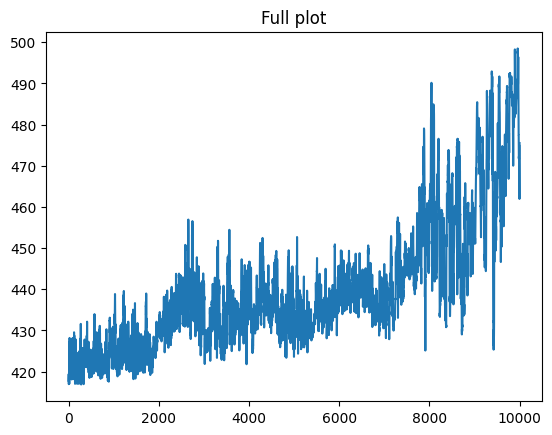

In [9]:
print(df_Clean.head(10))
df_Clean = df_Clean.loc[:,~df_Clean.columns.str.contains('^Unnamed')]
df_Clean_Small = df_Clean[:10000]
# df_Clean_Small.plot(x='TIMESTAMP', y='BattVolt',kind='scatter')

df_CO2 = df_Clean["CO2"]
df_CO2_Small = df_CO2[:10000]
# df_Clean_Small.plot()
df_CO2_Small.plot()
plt.title("Full plot")
plt.show()